In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("cleaned.csv")
# Drop 'Class' column and assign X values
X = df.drop(columns=['Class'])  
# Target variable is 'Class'
y = df['Class']  
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (984, 31)
Shape of y: (984,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# Define the architecture of the DNN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
#history =model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, ,validation_data=0.2,verbose=1)
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


# Evaluate the model on the test set
y_pred_dnn = model.predict(X_test_scaled)


C:\Users\Ruchi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5868 - loss: 0.6534 - val_accuracy: 0.8734 - val_loss: 0.4225
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8939 - loss: 0.3703 - val_accuracy: 0.9114 - val_loss: 0.2980
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9040 - loss: 0.2824 - val_accuracy: 0.9304 - val_loss: 0.2480
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9086 - loss: 0.2421 - val_accuracy: 0.9177 - val_loss: 0.2192
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9313 - loss: 0.2144 - val_accuracy: 0.9241 - val_loss: 0.2095
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9254 - loss: 0.2016 - val_accuracy: 0.9304 - val_loss: 0.1981
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9232 - loss: 0.1876 - val_accuracy: 0.9304 - val_loss: 0.1981
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9473 - loss: 0.1616 - val_accuracy: 0.9241 - val_loss

In [5]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

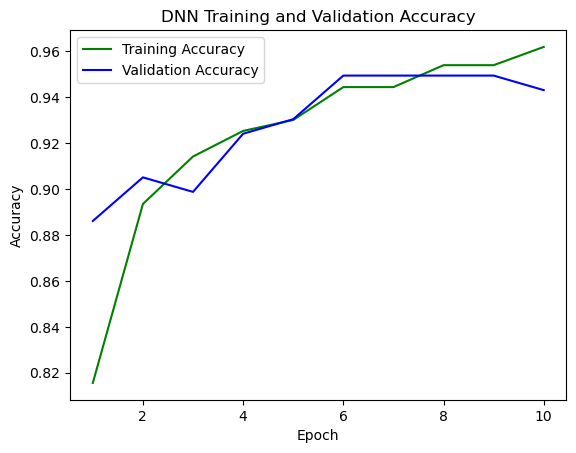

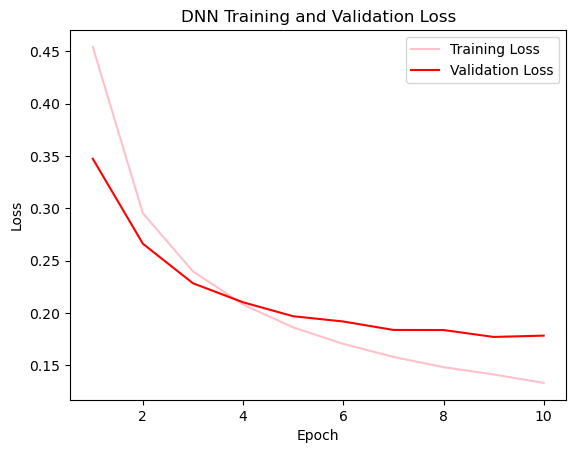

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('DNN Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("DNN-ACC-Stdscale.png") 
plt.show()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('DNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("DNN-Loss-Stdscale.png") 
plt.show()


In [7]:
quantile_scaler = QuantileTransformer()

# Fit and transform the training data
X_train_scaled_quantile = quantile_scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled_quantile = quantile_scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_quantile.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
#history =model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, ,validation_data=0.2,verbose=1)
history_qn = model.fit(X_train_scaled_quantile, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


# Evaluate the model on the test set
y_pred_dnn = model.predict(X_test_scaled_quantile)


Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (787). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Ruchi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7491 - loss: 0.6041 - val_accuracy: 0.9051 - val_loss: 0.4448
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8888 - loss: 0.4185 - val_accuracy: 0.9241 - val_loss: 0.2807
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9065 - loss: 0.2787 - val_accuracy: 0.9241 - val_loss: 0.2118
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9353 - loss: 0.2077 - val_accuracy: 0.9430 - val_loss: 0.1835
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9171 - loss: 0.2178 - val_accuracy: 0.9430 - val_loss: 0.1685
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9207 - loss: 0.2137 - val_accuracy: 0.9494 - val_loss: 0.1558
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9404 - loss: 0.1632 - val_accuracy: 0.9494 - val_loss: 0.1475
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9424 - loss: 0.1616 - val_accuracy: 0.9557 - val_loss: 0.1468
Ep

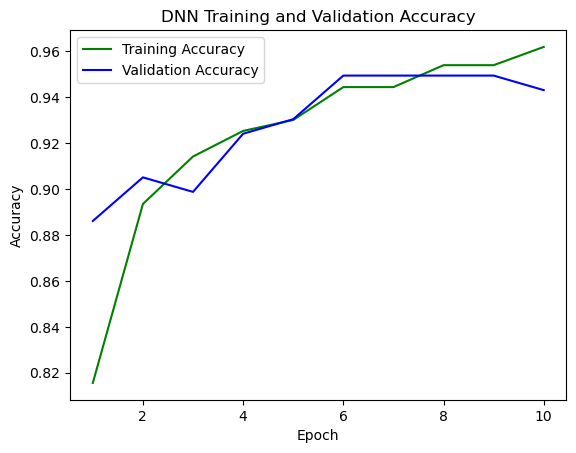

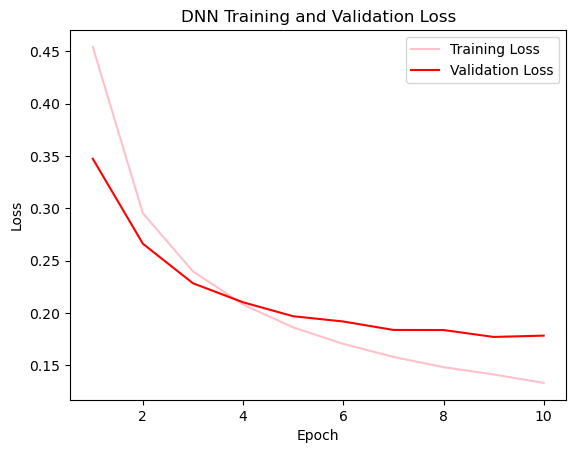

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('DNN Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig("DNN-ACC-QnScale.png") 
plt.show()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('DNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("DNN-Loss-QnSccale.png") 
plt.show()
